# Generate images using .npy files

`npy` files are numpy matrix that can be transformed to images using different apporaches. Here I used `PIL` 

In [190]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

Here is an example for one of the 3 folds PanNuke dataset has in the its repo.

In [191]:
images = '/mnt/isilon/PanNuke/Fold_3/images/fold3/images.npy'

In [192]:
# for npyfilename in filenames:
tissue = np.load(images)

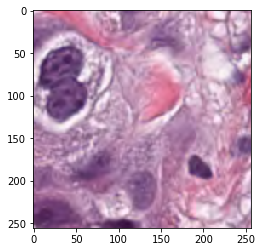

In [214]:
plt.imshow(np.uint8(tissue[10]), cmap='gray')
plt.show()

In [180]:
j=0
for i in tissue:
    im = Image.fromarray(np.uint8(i))
    im.save(f'/mnt/isilon/PanNuke/Fold_3/Images_png/{j}.png')
    j+=1

Masks have the same structure but there are 6 dimension arrayssome 

In [194]:
masks = '/mnt/isilon/PanNuke/Fold_3/masks/fold3/masks.npy'

# for npyfilename in filenames:
maks = np.load(masks)

In [182]:
maks.shape

(2722, 256, 256, 6)

In [215]:
image  = maks[10]

In [216]:
image[:,:,0][image[:,:,0]>0] = 0
image[:,:,1][image[:,:,1]>0] = 1
image[:,:,2][image[:,:,2]>0] = 2
image[:,:,3][image[:,:,3]>0] = 3
image[:,:,4][image[:,:,4]>0] = 4
image[:,:,5][image[:,:,5]>0] = 5

In [217]:
image.shape

(256, 256, 6)

In [218]:
im = image.sum(axis=2)

In [219]:
im[im>5]

array([], dtype=float64)

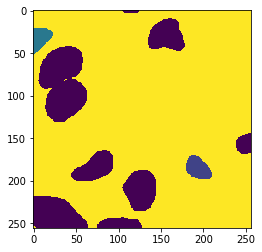

In [220]:
plt.imshow(np.uint8(im))
plt.show()

For every mask we join the 6 dimensions into one. Pixel with more than one value (>5) are transformed to 0

In [189]:
j=0
for i in maks:
    i[:,:,0][i[:,:,0]>0] = 0 #Neoplastic
    i[:,:,1][i[:,:,1]>0] = 1 #Limfo
    i[:,:,2][i[:,:,2]>0] = 2 #Connective
    i[:,:,3][i[:,:,3]>0] = 3 #Dead
    i[:,:,4][i[:,:,4]>0] = 4 #Epithelia
    i[:,:,5][i[:,:,5]>0] = 5 #Void
    #QC just in case there are weird values
    i[:,:,0][i[:,:,0]<0] = 0 #Neoplastic
    i[:,:,1][i[:,:,1]<0] = 0 #Limfo
    i[:,:,2][i[:,:,2]<0] = 0 #Connective
    i[:,:,3][i[:,:,3]<0] = 0 #Dead
    i[:,:,4][i[:,:,4]<0] = 0 #Epithelia
    i[:,:,5][i[:,:,5]<0] = 0 #Void
    i_2 = i.sum(axis=2)
    #Remve >5 values
    i_2[i_2>5] = 0
    im = Image.fromarray(np.uint8(i_2))
    im.save(f'/mnt/isilon/PanNuke/Fold_3/Masks_png/{j}.png')
    j+=1

In [175]:
try_im = Image.open('/mnt/isilon/PanNuke/Fold_2/Masks_png/2.png')

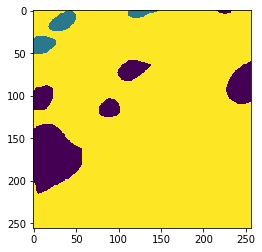

In [176]:
plt.imshow(try_im)
plt.show()